## **Quantium: customer analytics on Chips Products.**

**Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.**

**Project Objectives:**
1. Explore transaction data and produce insights on chips products
2. Analyse different customer segments and their contribution to chip sales
3. Investigate which brand and packet size customers prefer

**Importing necessary Libraries for Exploratory Data Analysis.**

In [1]:
# Data Analysis and Wrangling:
import numpy as np
import pandas as pd

# Date-time modules:
import datetime

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Importing the Datasets.**

**Importing the `QVI_purchase_behaviour.csv` dataset.**

In [3]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv', sep=',')
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#Checking for any null values in the purchase dataset.
purchase.isna().sum()
#There are no null values in the dataset.

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
purchase.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [7]:
# Changing the LIFESTAGE, PREMIUM_CUSTOMER Column's datatype into Category datatype
purchase[['LIFESTAGE', 'PREMIUM_CUSTOMER']] = purchase[['LIFESTAGE', 'PREMIUM_CUSTOMER']].astype('category')

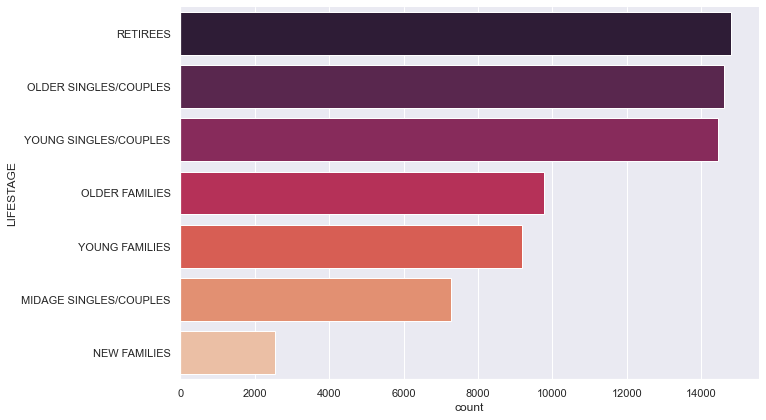

In [140]:
# Lifestage demographics for Supermarket Loyalty cards.
    # Retirees own/possess the most of the Loyalty cards.
    # Followed by Older Singles/Couples and Young Singles/Couples.
    # New families have the least number of people having a Loyalty card with the Supermarket.

sns.catplot(y='LIFESTAGE', data=purchase, kind="count", 
            order=purchase['LIFESTAGE'].value_counts().index, palette='rocket', height=6, aspect=1.8)

sns.set_theme(style='white')
sns.set_style("darkgrid")

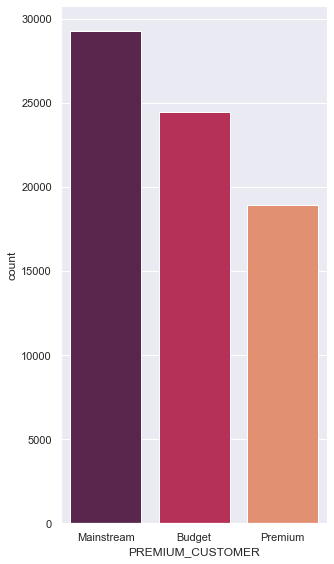

In [139]:
# Customer segmentation.
    # Mainstream customers hold the largest number of Loyalty Cards,
    # followed by Budget and Premium customers.
    
sns.catplot(x='PREMIUM_CUSTOMER', data=purchase, kind="count", 
            order=purchase['PREMIUM_CUSTOMER'].value_counts().index, 
            palette="rocket", height=8, aspect=0.6)
sns.set_theme(style='white')
sns.set_style("darkgrid")

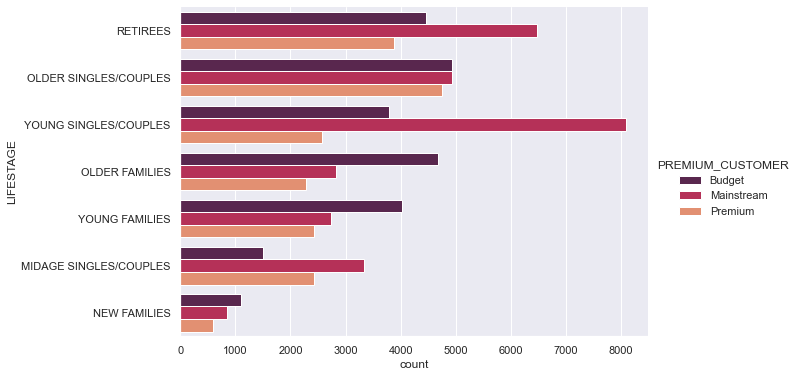

In [138]:
# Premium customer segmentation in each Lifestage that owns the Loyalty Card.
    #Inferences:

sns.catplot(y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=purchase, kind="count", 
            order=purchase['LIFESTAGE'].value_counts().index, 
            palette="rocket", legend_out=True, height=5.4, aspect=1.8)
sns.set_theme(style='white')
sns.set_style("darkgrid")

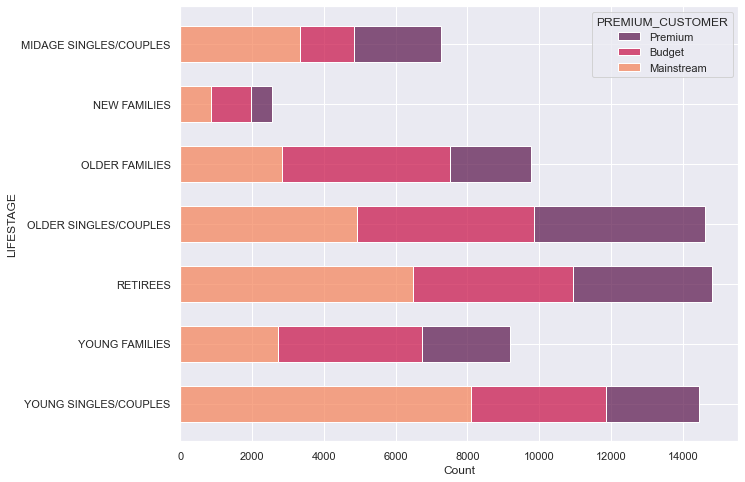

In [137]:
## Count plot for this data is not an accurate way of representing the given segementation.
# Let us use a Histplot to represent the segementation.
plt.subplots(figsize=(10,8))
sns.histplot(y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=purchase, stat="count", 
             multiple='stack', hue_order= ['Premium', 'Budget', 'Mainstream'], palette="rocket", shrink=0.6)
sns.set_theme(style='white')
sns.set_style("darkgrid")

**Importing the `QVI_transaction_data.xlsx` dataset.**

In [12]:
transaction = pd.read_excel('QVI_transaction_data.xlsx')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [14]:
#Checking for any null values in the transaction dataset.
transaction.isna().sum()
#There are no null values in the dataset.

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
transaction.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [16]:
#Total no. of unique products sold by the supermaket:
print(f"Total no. of unqiue products sold: {transaction['PROD_NAME'].nunique()}")

Total no. of unqiue products sold: 114


In [17]:
#Total no. of Stores under the Supermarket.
print(f"Total no. of Supermarket stores: {transaction['STORE_NBR'].nunique()}")

Total no. of Supermarket stores: 272


In [18]:
# Few basic tasks and analysis that can be performed:
    # 1. Check for the top 15 Best performing stores
    # 2. Check for the top 15 best chips sold by quantity and *by revenue*
    # 3. Find the total no. of chips brands.
    # 4. List all the unique brand names, find the unique number of products sold.
    # 5. Top 5 chips in each LIFESTAGE
    # 6. Create a List of Chips sold in each store and also a visualization related to that.
    # 7. Convert the Date column into DATE datatype and generate a correlation between 
        # the chips and time of buying.
    # 8. investigate about the TXN ID and it's relation with the Loyalty Card Number.
    # 9. Check the Top customers and the purchases they made.

For Date-time conversion: https://stackoverflow.com/questions/38454403/convert-excel-style-date-with-pandas?noredirect=1&lq=1

In [19]:
# DATE Column is not formatted properly.
# Function that converts Excel integer into yyyy-mm-dd format
origin = pd.Timestamp("30/12/1899")
transaction['DATE'] = transaction['DATE'].apply(lambda x: origin + pd.Timedelta(days=x))
transaction['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [65]:
print(f"Total no. of days supermarket remained open: {transaction['DATE'].nunique()}")

Total no. of days supermarket remained open: 364


In [68]:
print(f"Date data starts from: {min(transaction['DATE'])}")
print(f"Date data ends on: {max(transaction['DATE'])}")

Date data starts from: 2018-07-01 00:00:00
Date data ends on: 2019-06-30 00:00:00


In [66]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transaction['DATE'])
# Supermarket remains closed on Christmas.

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [20]:
transaction.loc[0, 'DATE'].day_name()

'Wednesday'

In [23]:
transaction['DAY'] = transaction['DATE'].apply(lambda x: x.day_name())

In [50]:
transaction.loc[:, ['DATE', 'DAY']]

,DATE,DAY
0,2018-10-17,Wednesday
1,2019-05-14,Tuesday
2,2019-05-20,Monday
3,2018-08-17,Friday
4,2018-08-18,Saturday
...,...,...
264831,2019-03-09,Saturday
264832,2018-08-13,Monday
264833,2018-11-06,Tuesday
264834,2018-12-27,Thursday


In [28]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   DAY             264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


In [27]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday


In [60]:
transaction['DAY'].value_counts()

Sunday       38718
Friday       38208
Wednesday    37979
Saturday     37812
Monday       37605
Thursday     37375
Tuesday      37139
Name: DAY, dtype: int64

In [ ]:
# Pivot Table approach to represent TOT_SALES data against dates and Day of the week.

In [69]:
date_sales = pd.pivot_table(transaction, values='TOT_SALES', index='DATE', aggfunc='sum')
date_sales.head(5)

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [84]:
day_sales = pd.pivot_table(transaction, values='TOT_SALES', index='DAY', aggfunc='sum')

In [88]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(weekdays)

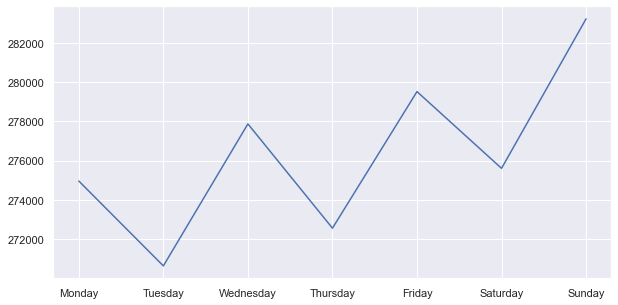

In [136]:
# All the days in the weeks have nearly the same amount of sales.
# Tuesday has the lowest sale becuse Christmas of 2018 was on a tuesday which 
# is reflected in the following graph.

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(day_sales.index, day_sales['TOT_SALES'])
sns.set_style("darkgrid")

In [101]:
# Checking for outliers in the Product Quantity Columns
# These bulk orders were placed by the same customer on two seperate dates.
transaction[transaction['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Sunday
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Monday


In [102]:
#removing the outliers from the transaction data
transaction = transaction[transaction['PROD_QTY'] < 5]
transaction[transaction['PROD_QTY'] > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY


In [103]:
# Primary Tasks at hand:
    #Task-1: Extract the brand name from the PROD_NAME column in the transaction dataset.
    #Task-2: Also extract the Package size data fromt the PROD_NAME column.

In [104]:
%%time
#Extracting the brand name from the PROD_NAME Column
def brand_name(tr):
    return tr["PROD_NAME"].split()[0]
# Adding the Brand Name Column to the transaction dataset.
transaction['BRAND_NAME'] = transaction.apply(brand_name, axis=1)
transaction.head(5)

Wall time: 3.74 s


<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday,Kettle
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Sunday,Old


In [105]:
transaction['BRAND_NAME'].unique()
# we can notice that few of the brand names have been abbreviated and few have missing letters.
# --> Dorito == Doritos; Infzns = Infuzions; WW == Woolworths; Snbts == Sunbites;

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Tyrrells',
       'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'GrnWves', 'Sunbites'], dtype=object)

In [106]:
# transaction[transaction['BRAND_NAME'] == 'GRNWVES']
# transaction[transaction['BRAND_NAME'] == 'RRD']
# transaction[transaction['BRAND_NAME'] == 'WOOLWORTHS']

In [107]:
# Red, RRD => Red Rock Deli
# grain, GRNWVES => Grain Waves
# Doritos => Doritos
# ww => Woolworths
# infzns => Infuzions
# dorito => Doritos
# snbts => Sunbites

chips_names = {'dorito':'DORITOS', 'infzns':'INFUZIONS', 'ww':'WOOLWORTHS', 'red':'RRD', 
               'ncc':'NATURAL','snbts':'SUNBITES', 'smith':'SMITHS','grain':'GRNWVES'}

# The following part of code will replace the irregulrities in Brand names with the entries inside
# the dictionary, by converting all the entries to lower case and then replacing the values 
# corresponding to the keys of the dictionary, and finally it will convert all the text to uppercase.

transaction['BRAND_NAME'] = transaction['BRAND_NAME'].str.lower().replace(chips_names).str.upper()
transaction.head(5)

C:\Users\SUBHRA~1\AppData\Local\Temp/ipykernel_16048/1418720997.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['BRAND_NAME'] = transaction['BRAND_NAME'].str.lower().replace(chips_names).str.upper()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday,KETTLE
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Sunday,OLD


In [108]:
transaction['BRAND_NAME'].unique()

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'OLD', 'GRNWVES', 'DORITOS',
       'TWISTIES', 'WOOLWORTHS', 'THINS', 'BURGER', 'CHEEZELS',
       'INFUZIONS', 'RRD', 'PRINGLES', 'TYRRELLS', 'COBS', 'FRENCH',
       'TOSTITOS', 'CHEETOS', 'SUNBITES'], dtype=object)

In [109]:
print(f"Total no. of unique brands: {transaction['BRAND_NAME'].nunique()}")

Total no. of unique brands: 21


In [110]:
transaction['BRAND_NAME'].value_counts()

KETTLE        41221
SMITHS        31774
DORITOS       28101
PRINGLES      25051
RRD           17744
WOOLWORTHS    14729
INFUZIONS     14182
THINS         14048
COBS           9678
TOSTITOS       9458
TWISTIES       9436
OLD            9309
GRNWVES        7729
NATURAL        7453
TYRRELLS       6436
CHEEZELS       4597
CCS            4544
SUNBITES       2998
CHEETOS        2921
BURGER         1557
FRENCH         1418
Name: BRAND_NAME, dtype: int64

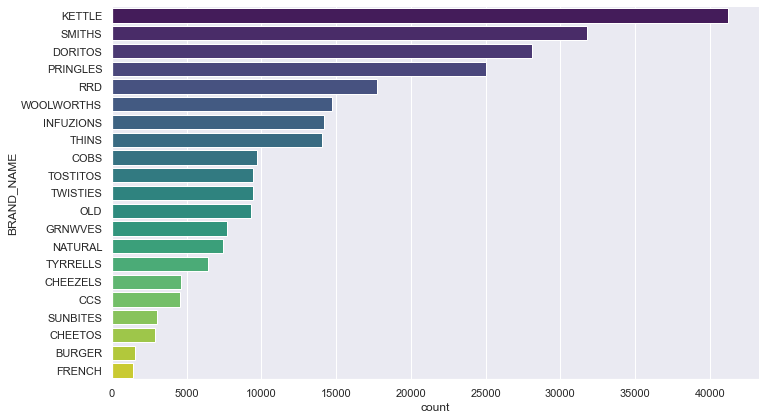

In [135]:
# A large chunk of customers prefer KETTLE, SMITHS and DORITOS over other brands of chips.
sns.catplot(y='BRAND_NAME', data=transaction, kind="count", 
            order=transaction['BRAND_NAME'].value_counts().index, 
            palette="viridis", height=6, aspect=1.8)

sns.set_theme(style='white')
sns.set_style("darkgrid")

#### **Transaction trends based on Stores.**

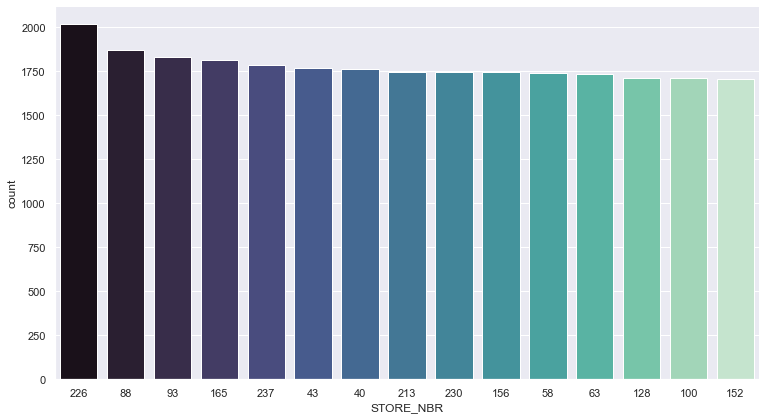

In [134]:
# Top-15 stores by number of transactions.
    # Store with the max number of Transaction in Chips = (STORE_NBR: 226)
    # Followed by store #88 and #93.
    # Top-15 stores have more or less the same number of transactions
sns.catplot(x='STORE_NBR', data=transaction, kind="count", 
            order=transaction['STORE_NBR'].value_counts().iloc[:15].index, 
            palette="mako", height=6, aspect=1.8)

sns.set_theme(style='white')
sns.set_style("darkgrid")

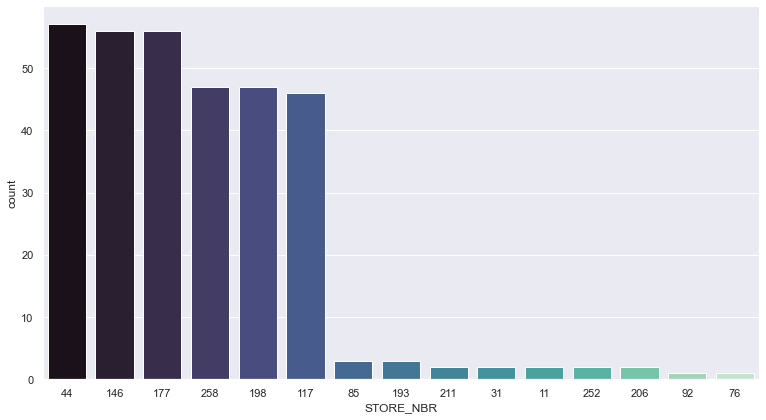

In [132]:
# Last-15 stores by number of transactions.
sns.catplot(x='STORE_NBR', data=transaction, kind="count", 
            order=transaction['STORE_NBR'].value_counts().iloc[-15:].index, 
            palette="mako", height=6, aspect=1.8)

sns.set_theme(style='white')
sns.set_style("darkgrid")

In [114]:
%%time
# Extracting the package size from the PROD_NAME Column
def product_size(df):
    # joining any digit
    num  = ''.join(n for n in df['PROD_NAME'] if n.isdigit())
    return int(num)
# Adding the Packet size feature to the Transaction data.
transaction['PROD_SIZE'] = transaction.apply(product_size, axis=1)
transaction.head(5)

Wall time: 4.62 s


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,BRAND_NAME,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,NATURAL,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday,CCS,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday,SMITHS,170
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday,KETTLE,150
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Sunday,OLD,300


In [115]:
transaction['PROD_SIZE'].isna().value_counts()
# No missing values.

False    264384
Name: PROD_SIZE, dtype: int64

In [116]:
#Let us have a look at the product sizing available:
    # Product size and customer correlaion
    # Packaging size and brands
    
# Various Packaging sizes:   
print(f"Various Packaging sizes: {transaction['PROD_SIZE'].unique()}\n")
print(f"The Largest Packaging weighs: {max(transaction['PROD_SIZE'])}g")
print(f"The Smallest Packaging weighs: {min(transaction['PROD_SIZE'])}g")

Various Packaging sizes: [175 170 150 300 330 210 270 220 125 110 134 380 165 135 250 200 160 190
  90 180  70]

The Largest Packaging weighs: 380g
The Smallest Packaging weighs: 70g


In [117]:
# Packaging sizes:
transaction['PROD_SIZE'].value_counts()

175    66280
150    43063
134    25051
110    22356
170    19947
165    15272
300    15135
330    12528
380     6402
270     6272
210     6264
200     4467
135     3253
250     3164
90      2998
190     2991
160     2963
220     1557
70      1504
180     1465
125     1452
Name: PROD_SIZE, dtype: int64

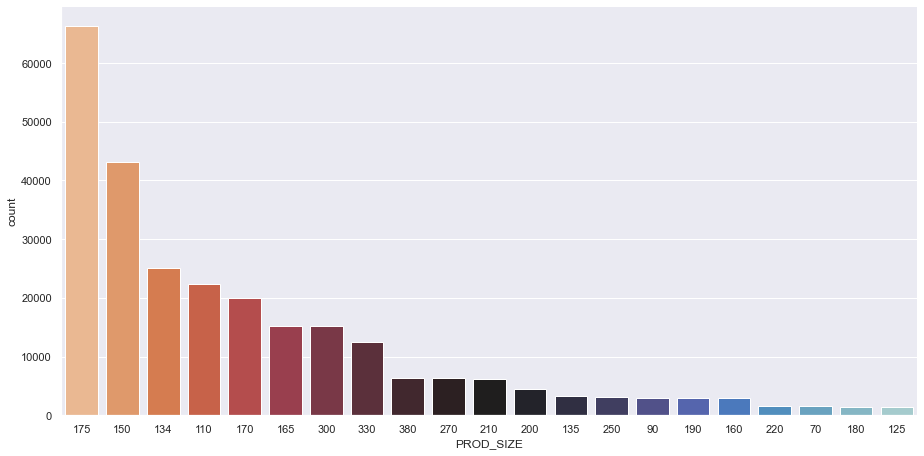

In [133]:
sns.catplot(x='PROD_SIZE', data=transaction, kind="count", 
            order=transaction['PROD_SIZE'].value_counts().index, 
            palette="icefire_r", height=6.5, aspect=2)

sns.set_theme(style='white')
sns.set_style("darkgrid")

In [121]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264384 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264384 non-null  datetime64[ns]
 1   STORE_NBR       264384 non-null  int64         
 2   LYLTY_CARD_NBR  264384 non-null  int64         
 3   TXN_ID          264384 non-null  int64         
 4   PROD_NBR        264384 non-null  int64         
 5   PROD_NAME       264384 non-null  object        
 6   PROD_QTY        264384 non-null  int64         
 7   TOT_SALES       264384 non-null  float64       
 8   DAY             264384 non-null  object        
 9   BRAND_NAME      264384 non-null  object        
 10  PROD_SIZE       264384 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 32.3+ MB


**Merging both the Data:**

In [123]:
chips_customer = transaction.merge(purchase, how='left', on='LYLTY_CARD_NBR')
chips_customer.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,BRAND_NAME,PROD_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,NATURAL,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Tuesday,CCS,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Monday,SMITHS,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Saturday,KETTLE,150,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Sunday,OLD,300,MIDAGE SINGLES/COUPLES,Budget


In [124]:
print("Transaction data shape: ", transaction.shape)
print("Customer data shape: ", purchase.shape)
print("Combined data shape: ", chips_customer.shape)

Transaction data shape:  (264384, 11)
Customer data shape:  (72637, 3)
Combined data shape:  (264384, 13)


In [127]:
total_sales = pd.DataFrame(chips_customer.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())

In [128]:
total_sales.sort_values(by='TOT_SALES', ascending=False, inplace=True)

In [129]:
total_sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          167496.75
Mainstream       YOUNG SINGLES/COUPLES   157243.40
                 RETIREES                155150.05
Budget           YOUNG FAMILIES          138624.00
                 OLDER SINGLES/COUPLES   136332.30
Mainstream       OLDER SINGLES/COUPLES   132912.30
Premium          OLDER SINGLES/COUPLES   131635.15
Budget           RETIREES                112700.80
Mainstream       OLDER FAMILIES          102829.10
Premium          RETIREES                 97207.80
Mainstream       YOUNG FAMILIES           92333.75
                 MIDAGE SINGLES/COUPLES   90390.60
Premium          YOUNG FAMILIES           83618.10
                 OLDER FAMILIES           80166.40
Budget           YOUNG SINGLES/COUPLES    60948.10
Premium          MIDAGE SINGLES/COUPLES   58152.15
                 YOUNG SINGLES/COUPLES    41554.60
Budget           MIDAGE SINGLES/COUPLES   35343.80
                 NEW FAMILIES             21868.95
Mainstream       NEW FAMILIES             16955.65
Premium          NEW FAMILIES             11468.10

**Observations & Conclusions:**